**Importing libraries**

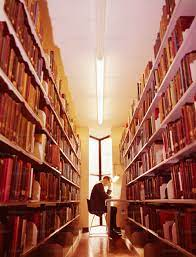

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd  #data manipulation
from sklearn.model_selection import train_test_split #train the model on one subset of data and then evaluate its performance on another independent subset.
from sklearn.preprocessing import LabelEncoder # encode categorical labels (textual labels) into numerical values.
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = '/content/drive/MyDrive/companies.csv'
df = pd.read_csv(file_path)
df

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


**DATA PRERPOCESSING**

**Data preprocessing is the concept of changing the raw data into a clean data set. The dataset is preprocessed in order to check missing values, noisy data, and other inconsistencies before executing it to the algorithm.**



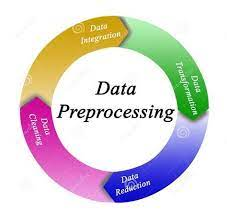

**1.Data Exploring**

**2.Data Cleaning**

**3.Data Encoding**

**4.Data Labelling**

**DATA EXPLORATION**

**Data exploration is the initial step in the data analysis process where you aim to understand the main characteristics of your dataset. The primary goal is to summarize its main features, often with the help of statistical graphics and other data visualization methods.**


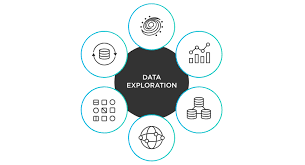

In [6]:
# 1. Data Exploration
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  log

In [7]:
# Display statistical summary of numerical features
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
        Unnamed: 0.1      entity_id  parent_id     logo_width    logo_height  \
count  196553.000000  196553.000000        0.0  110110.000000  110110.000000   
mean    98276.000000  153006.227333        NaN     459.132685     222.728917   
std     56740.108067   90209.250941        NaN     594.982577     333.090722   
min         0.000000       1.000000        NaN       1.000000       1.000000   
25%     49138.000000   59850.000000        NaN     192.000000      70.000000   
50%     98276.000000  174539.000000        NaN     267.000000     105.000000   
75%    147414.000000  232655.000000        NaN     484.000000     232.000000   
max    196552.000000  286215.000000        NaN   18200.000000    9600.000000   

       investment_rounds  invested_companies  funding_rounds  \
count        2591.000000         2591.000000    31707.000000   
mean            2.372057            2.204940        1.659760   
std            12.173510           11.436955        1.201666   
m

In [8]:
# Display the first few rows of the dataset
print("\nFirst few rows:")
print(df.head())


First few rows:
        id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  ... first_milestone_at last_milestone_at  \
0              web  operating  ...         2010-09-05        2013-09-18   
1      games_vi

In [9]:
df.shape

(196553, 44)

**DATA CLEANING**

**Data cleansing, is the process of fixing incorrect, incomplete, duplicate data in a data set. It involves identifying data errors and then changing, updating or removing data to correct them. Data cleansing improves data quality and helps provide more accurate, consistent and reliable information for decision-making in an organization.**



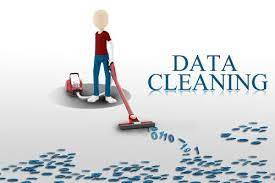

In [10]:
#here we drop the columns with null values
columns_to_drop = ['Unnamed: 0.1', 'permalink', 'normalized_name','short_description']
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(196553, 40)

In [11]:
df.fillna(0, inplace=True)

In [12]:
#Coverting date columns to date time
date_columns = ['founded_at' ,'twitter_username','closed_at', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', 'created_at', 'updated_at']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   196553 non-null  object        
 1   entity_type          196553 non-null  object        
 2   entity_id            196553 non-null  int64         
 3   parent_id            196553 non-null  float64       
 4   name                 196553 non-null  object        
 5   category_code        196553 non-null  object        
 6   status               196553 non-null  object        
 7   founded_at           196553 non-null  datetime64[ns]
 8   closed_at            196553 non-null  datetime64[ns]
 9   domain               196553 non-null  object        
 10  homepage_url         196553 non-null  object        
 11  twitter_username     115963 non-null  datetime64[ns]
 12  logo_url             196553 non-null  object        
 13  logo_width    

In [13]:
#based on founded_at column we are calculating company age
current_year = pd.to_datetime('today').year
df['company_age'] = current_year - df['founded_at'].dt.year
df['company_age']

0         19
1         54
2         54
3         16
4         16
          ..
196548    17
196549    17
196550    65
196551    16
196552    17
Name: company_age, Length: 196553, dtype: int64

In [14]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages)

id                      0.000000
entity_type             0.000000
entity_id               0.000000
parent_id               0.000000
name                    0.000000
category_code           0.000000
status                  0.000000
founded_at              0.000000
closed_at               0.000000
domain                  0.000000
homepage_url            0.000000
twitter_username       41.001664
logo_url                0.000000
logo_width              0.000000
logo_height             0.000000
description             0.000000
overview                0.000000
tag_list                0.000000
country_code            0.000000
state_code              0.000000
city                    0.000000
region                  0.000000
first_investment_at     0.000000
last_investment_at      0.000000
investment_rounds       0.000000
invested_companies      0.000000
first_funding_at        0.000000
last_funding_at         0.000000
funding_rounds          0.000000
funding_total_usd       0.000000
first_mile

In [15]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [16]:
# Dropping columns with NaN values (you can adjust the threshold)
threshold = 0.8 # For example, drop columns with more than 80% NaN values
columns_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
df['founded_at']

0        2005-10-17
1        1970-01-01
2        1970-01-01
3        2008-07-26
4        2008-07-26
            ...    
196548   2007-01-01
196549   2007-11-01
196550   1959-01-01
196551   2008-07-01
196552   2007-09-01
Name: founded_at, Length: 196553, dtype: datetime64[ns]

In [18]:
# Remove unnecessary and corrupted data
df = df[~df['status'].isin(['corrupted_value'])]

In [19]:
df.dropna(subset=['founded_at'], inplace=True)

In [20]:
df['first_milestone_at']

0        2010-09-05
1        1970-01-01
2        2003-02-01
3        1970-01-01
4        1970-01-01
            ...    
196548   2013-08-12
196549   2013-05-01
196550   2012-01-01
196551   1970-01-01
196552   2006-07-01
Name: first_milestone_at, Length: 196553, dtype: datetime64[ns]

In [21]:
median_date = df['first_milestone_at'].dropna().median()
df['first_milestone_at'].fillna(median_date, inplace=True)

In [22]:
df.isnull().sum()

id                         0
entity_type                0
entity_id                  0
parent_id                  0
name                       0
category_code              0
status                     0
founded_at                 0
closed_at                  0
domain                     0
homepage_url               0
twitter_username       80590
logo_url                   0
logo_width                 0
logo_height                0
description                0
overview                   0
tag_list                   0
country_code               0
state_code                 0
city                       0
region                     0
first_investment_at        0
last_investment_at         0
investment_rounds          0
invested_companies         0
first_funding_at           0
last_funding_at            0
funding_rounds             0
funding_total_usd          0
first_milestone_at         0
last_milestone_at          0
milestones                 0
relationships              0
created_by    

In [23]:
df['twitter_username']

0               NaT
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
196548          NaT
196549          NaT
196550          NaT
196551   1970-01-01
196552          NaT
Name: twitter_username, Length: 196553, dtype: datetime64[ns]

In [24]:
median_date = df['twitter_username'].dropna().median()
df['twitter_username'].fillna(median_date, inplace=True)

In [25]:
df.isnull().sum()

id                     0
entity_type            0
entity_id              0
parent_id              0
name                   0
category_code          0
status                 0
founded_at             0
closed_at              0
domain                 0
homepage_url           0
twitter_username       0
logo_url               0
logo_width             0
logo_height            0
description            0
overview               0
tag_list               0
country_code           0
state_code             0
city                   0
region                 0
first_investment_at    0
last_investment_at     0
investment_rounds      0
invested_companies     0
first_funding_at       0
last_funding_at        0
funding_rounds         0
funding_total_usd      0
first_milestone_at     0
last_milestone_at      0
milestones             0
relationships          0
created_by             0
created_at             0
updated_at             0
lat                    0
lng                    0
ROI                    0


**DATA ENCODING**

**Data encoding refers to the process of converting data from one format or representation to another. This conversion is necessary for various reasons, such as storage, transmission, or processing. Different types of data encoding methods exist, and they serve specific purposes.**



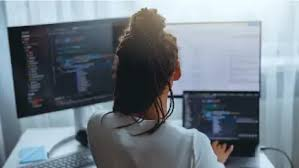

In [26]:
# 3. Data Encoding
# Assuming you have categorical columns that need to be encoded
label_encoder = LabelEncoder()
df['encoded_column'] = label_encoder.fit_transform(df['status'])

In [27]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['status'])

# Display the mapping between original values and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'acquired': 0, 'closed': 1, 'ipo': 2, 'operating': 3}


**DATA LABELLING**

**Data labeling is a crucial step in the process of preparing and annotating data for machine learning models. It involves attaching meaningful and descriptive labels to specific elements or instances in a dataset. The purpose of data labeling is to provide supervised learning algorithms with correctly annotated examples, enabling them to learn patterns and make predictions or classifications.**






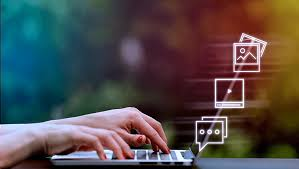

In [28]:
# 4. Data Labelling
# Assuming the target variable is 'status' with values 'Operating', 'IPO', 'Acquired', 'Closed'
# Map the labels to numerical values
label_mapping = {'acquired': 0, 'closed': 1, 'ipo': 2, 'operating': 3}
df['label'] = df['status'].map(label_mapping)
df['label']


0         3
1         0
2         0
3         3
4         3
         ..
196548    3
196549    3
196550    3
196551    3
196552    3
Name: label, Length: 196553, dtype: int64

In [29]:
# Aggregating group is a collection of physical interfaces that are bundled together for the purpose of load distribution and redundancy.
# Here with the targeted column 'status', we bundle 'milestones' and 'relationships' together.
aggregated_group = df.groupby('status')[['milestones', 'relationships']].mean()
print(aggregated_group)

           milestones  relationships
status                              
acquired     0.757931       3.421759
closed       0.782121       2.310759
ipo          1.578483      23.253968
operating    0.539972       1.664481


In [30]:
pivot_table = df.pivot_table(index='status', columns='category_code', values='investment_rounds', aggfunc='mean')
print(pivot_table)

category_code         0  advertising  analytics  automotive   biotech  \
status                                                                  
acquired       0.008073     0.022436   0.000000         0.0  0.021978   
closed         0.000000     0.000000   0.000000         0.0  0.008547   
ipo            0.538462     0.208333   0.000000         0.0  0.449393   
operating      0.026302     0.008294   0.002073         0.0  0.031847   

category_code  cleantech  consulting  design  ecommerce  education  ...  \
status                                                              ...   
acquired        0.000000    0.014706     0.0   0.036900   0.000000  ...   
closed          0.000000    0.032258     0.0   0.000000   0.000000  ...   
ipo             0.232143    0.238095     NaN   1.360000   0.000000  ...   
operating       0.017109    0.024284     0.0   0.003485   0.005954  ...   

category_code  real_estate    search  security  semiconductor    social  \
status                             

In [31]:
avg_software_for_ipo = pivot_table.loc['ipo', 'software']
print("Average value of software for IPO companies:", avg_software_for_ipo)

Average value of software for IPO companies: 0.9035087719298246


In [32]:
lowest_avg_category_acquired = pivot_table.loc['acquired'].idxmin()
print("Category with average value for acquired companies:", lowest_avg_category_acquired)

Category with average value for acquired companies: analytics


In [33]:
total_avg_value_operating = pivot_table.loc['operating'].mean()
print("Total average value of all categories for operating companies:", total_avg_value_operating)

Total average value of all categories for operating companies: 0.03972185412316683


In [34]:
total_companies_software = pivot_table['software'].sum()
print("Total number of companies in the 'software' category:", total_companies_software)

Total number of companies in the 'software' category: 0.9385470456738285


**EXPLORATORY DATA ANALYSIS(EDA)**

**Exploratory Data Analysis, is an approach to analyzing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. The primary goal of EDA is to uncover patterns, relationships, anomalies, and insights within the data, helping analysts make sense of the information and generate hypotheses for further investigation.**

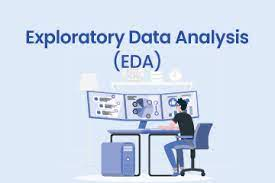

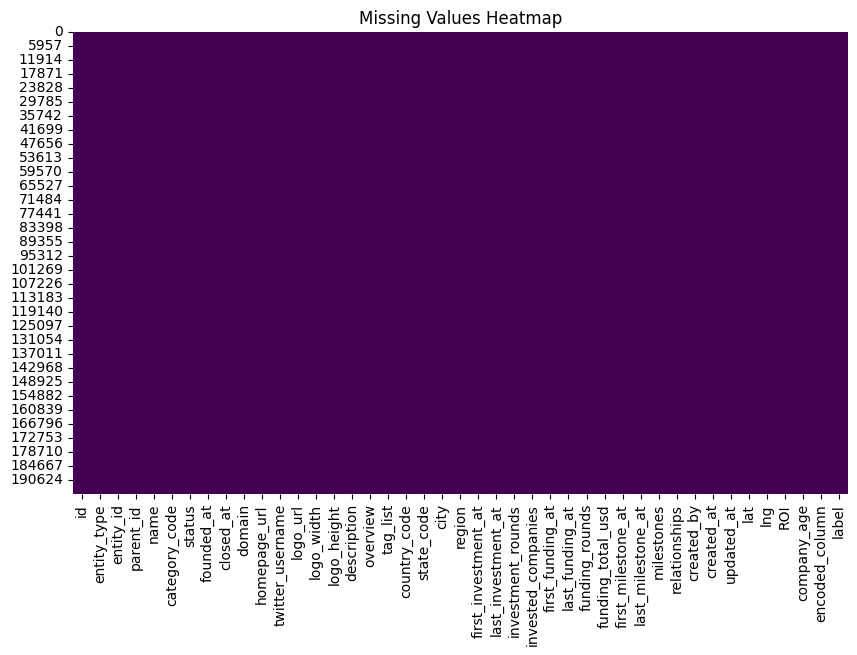

In [35]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

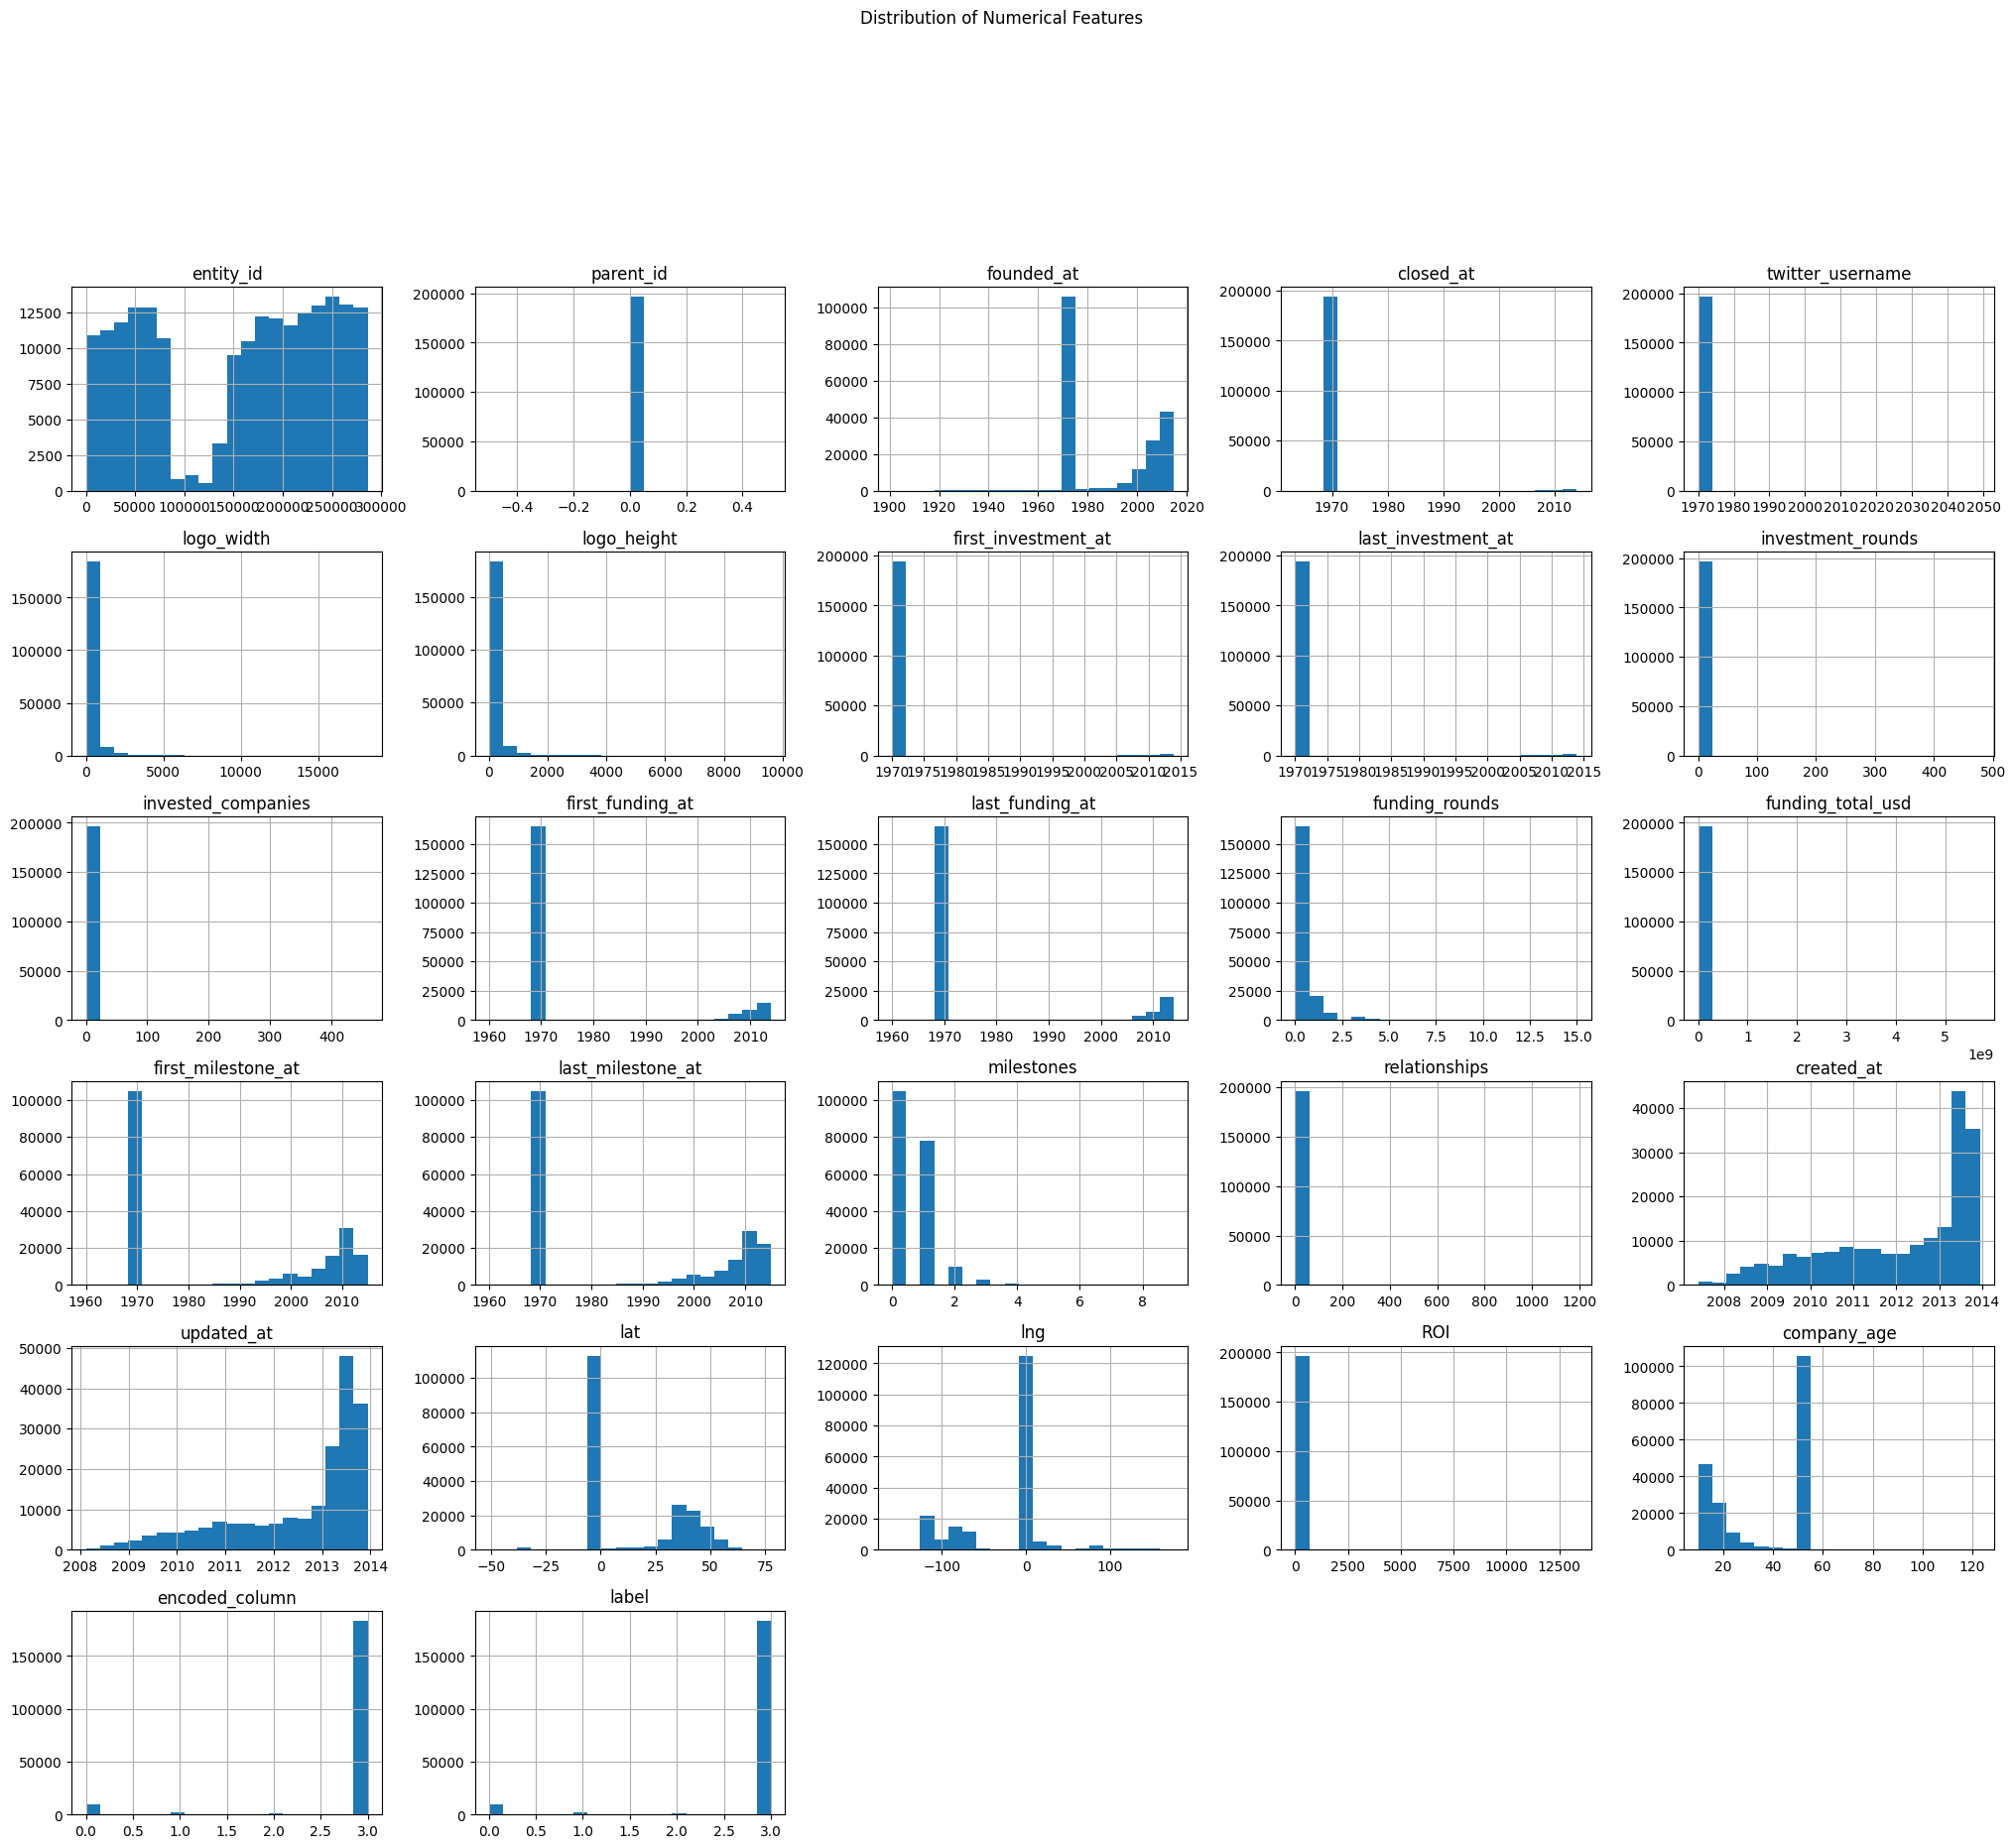

In [36]:
# Visualize the distribution of numerical features
df.hist(figsize=(25,20), bins=20)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

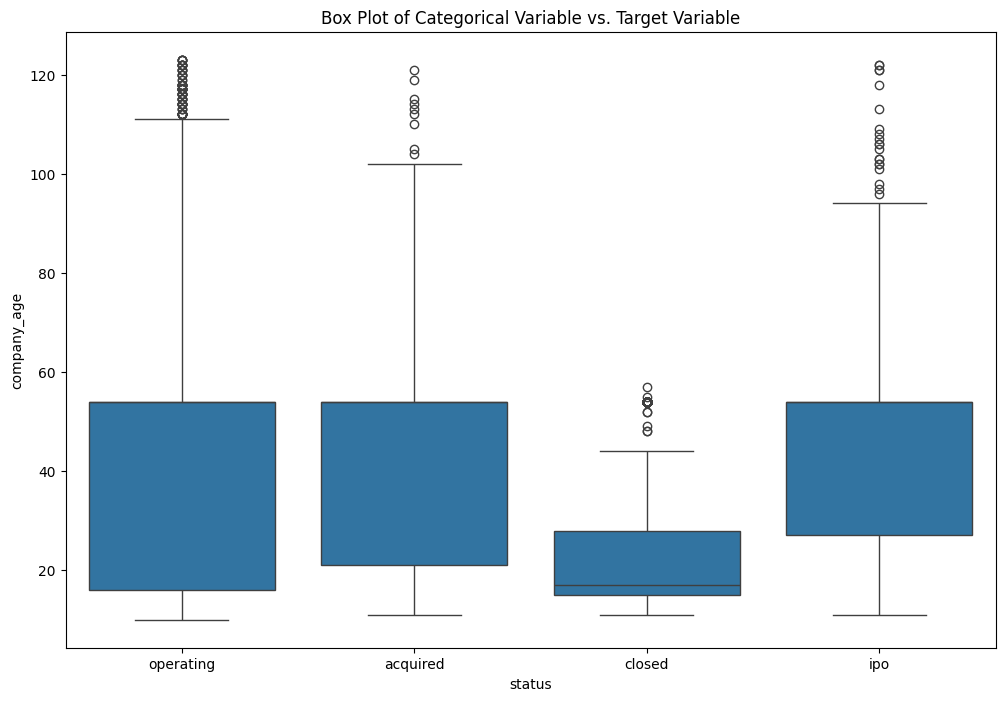

In [37]:
# Box plot for categorical variables[company age] against the target variable[status]
plt.figure(figsize=(12, 8))
sns.boxplot(x='status', y='company_age', data=df)
plt.title('Box Plot of Categorical Variable vs. Target Variable')
plt.show()

**UNIVARIATE ANALYSIS**

**Univariate analysis involves the exploration and analysis of a single variable, focusing on its distribution, summary statistics, and visual representations. The primary goal is to understand the characteristics of the variable in isolation.**


In [38]:
df.describe()

,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI,company_age,encoded_column,label
count,196553.000000,196553.0,196553.000000,196553.000000,196553.000000,196553.000000,196553.000000,1.965530e+05,196553.000000,196553.000000,196553.000000,196553.000000,196553.000000,196553.000000,196553.000000,196553.000000
mean,153006.227333,0.0,257.208488,124.773883,0.031269,0.029066,0.267745,2.101193e+06,0.559564,1.881523,16.025497,-22.236360,0.168967,37.420858,2.824556,2.824556
std,90209.250941,0.0,500.251035,272.720523,1.423368,1.336739,0.778228,2.603485e+07,0.702939,7.513977,21.151018,52.515658,34.852537,19.031150,0.676551,0.676551
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-50.942326,-159.497746,0.000000,10.000000,0.000000,0.000000
25%,59850.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-74.005973,0.000000,16.000000,3.000000,3.000000
50%,174539.000000,0.0,143.000000,52.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,54.000000,3.000000,3.000000
75%,232655.000000,0.0,295.000000,120.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,37.774929,0.000000,0.000000,54.000000,3.000000,3.000000
max,286215.000000,0.0,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333,123.000000,3.000000,3.000000


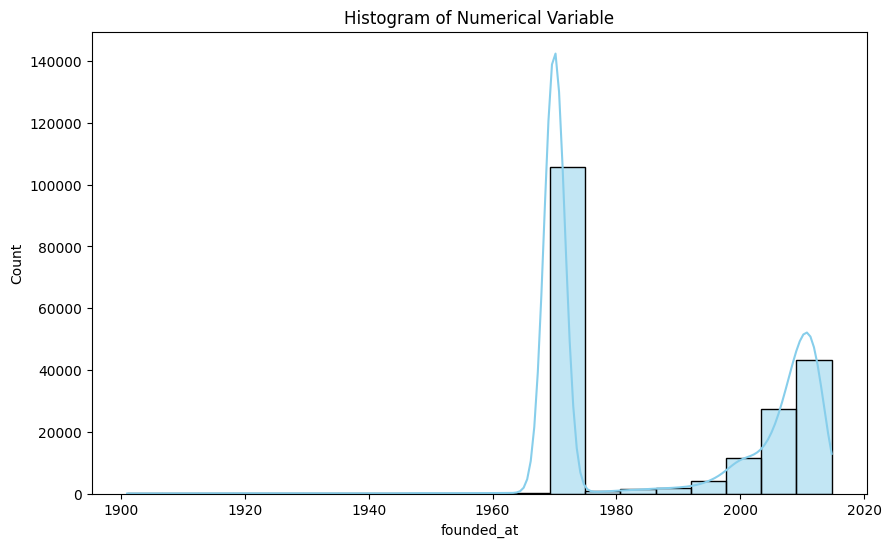

In [79]:
# Plot histogram for a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(df['founded_at'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Numerical Variable')
plt.show()

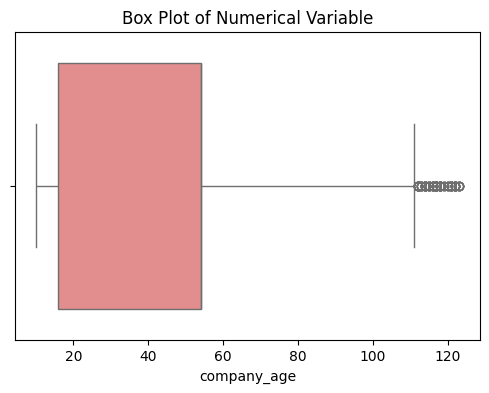

In [40]:
# Plot box plot for a numerical variable
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['company_age'], color='lightcoral')
plt.title('Box Plot of Numerical Variable')
plt.show()

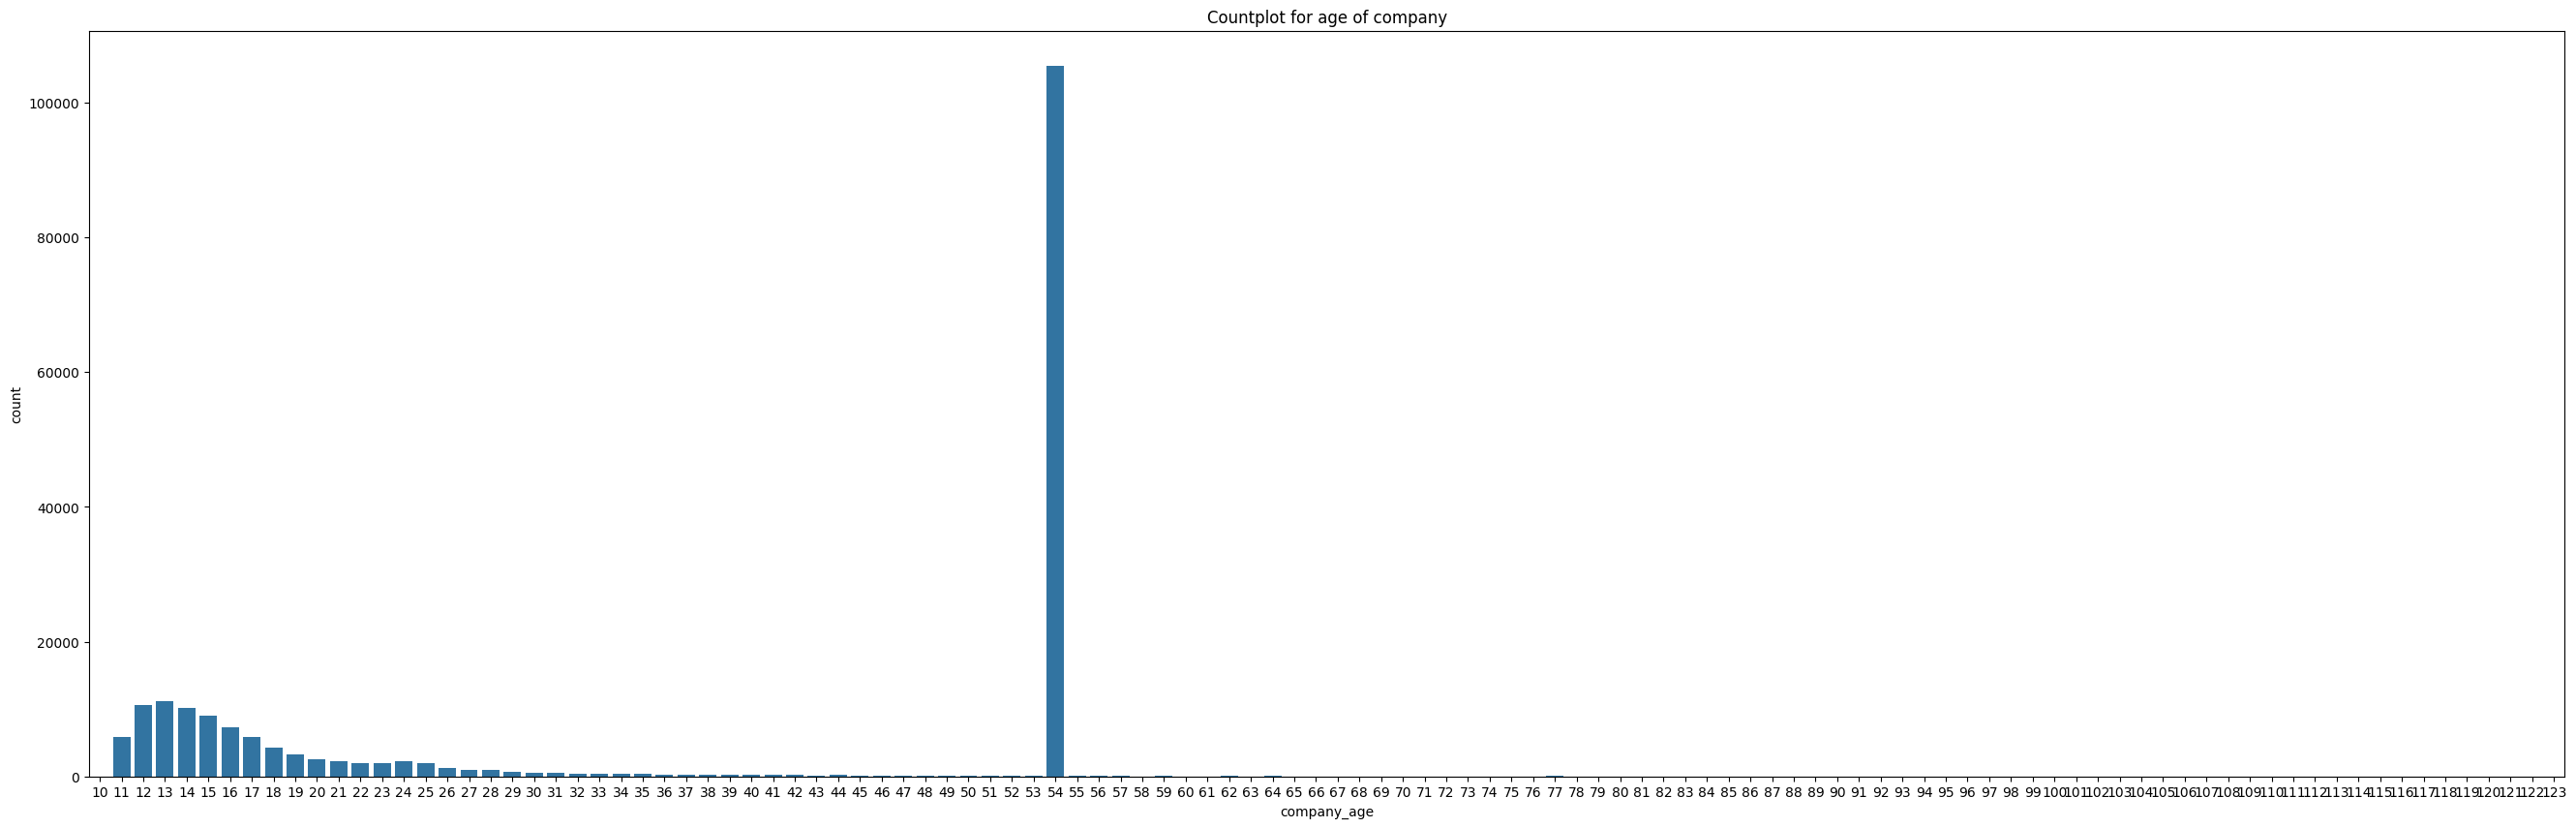

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'category_column' is the categorical variable
plt.figure(figsize=(33, 10))
sns.countplot(x='company_age', data=df)
plt.title('Countplot for age of company')
plt.show()

<ipython-input-84-8d6691b62fb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_code', data=df, palette='pastel')


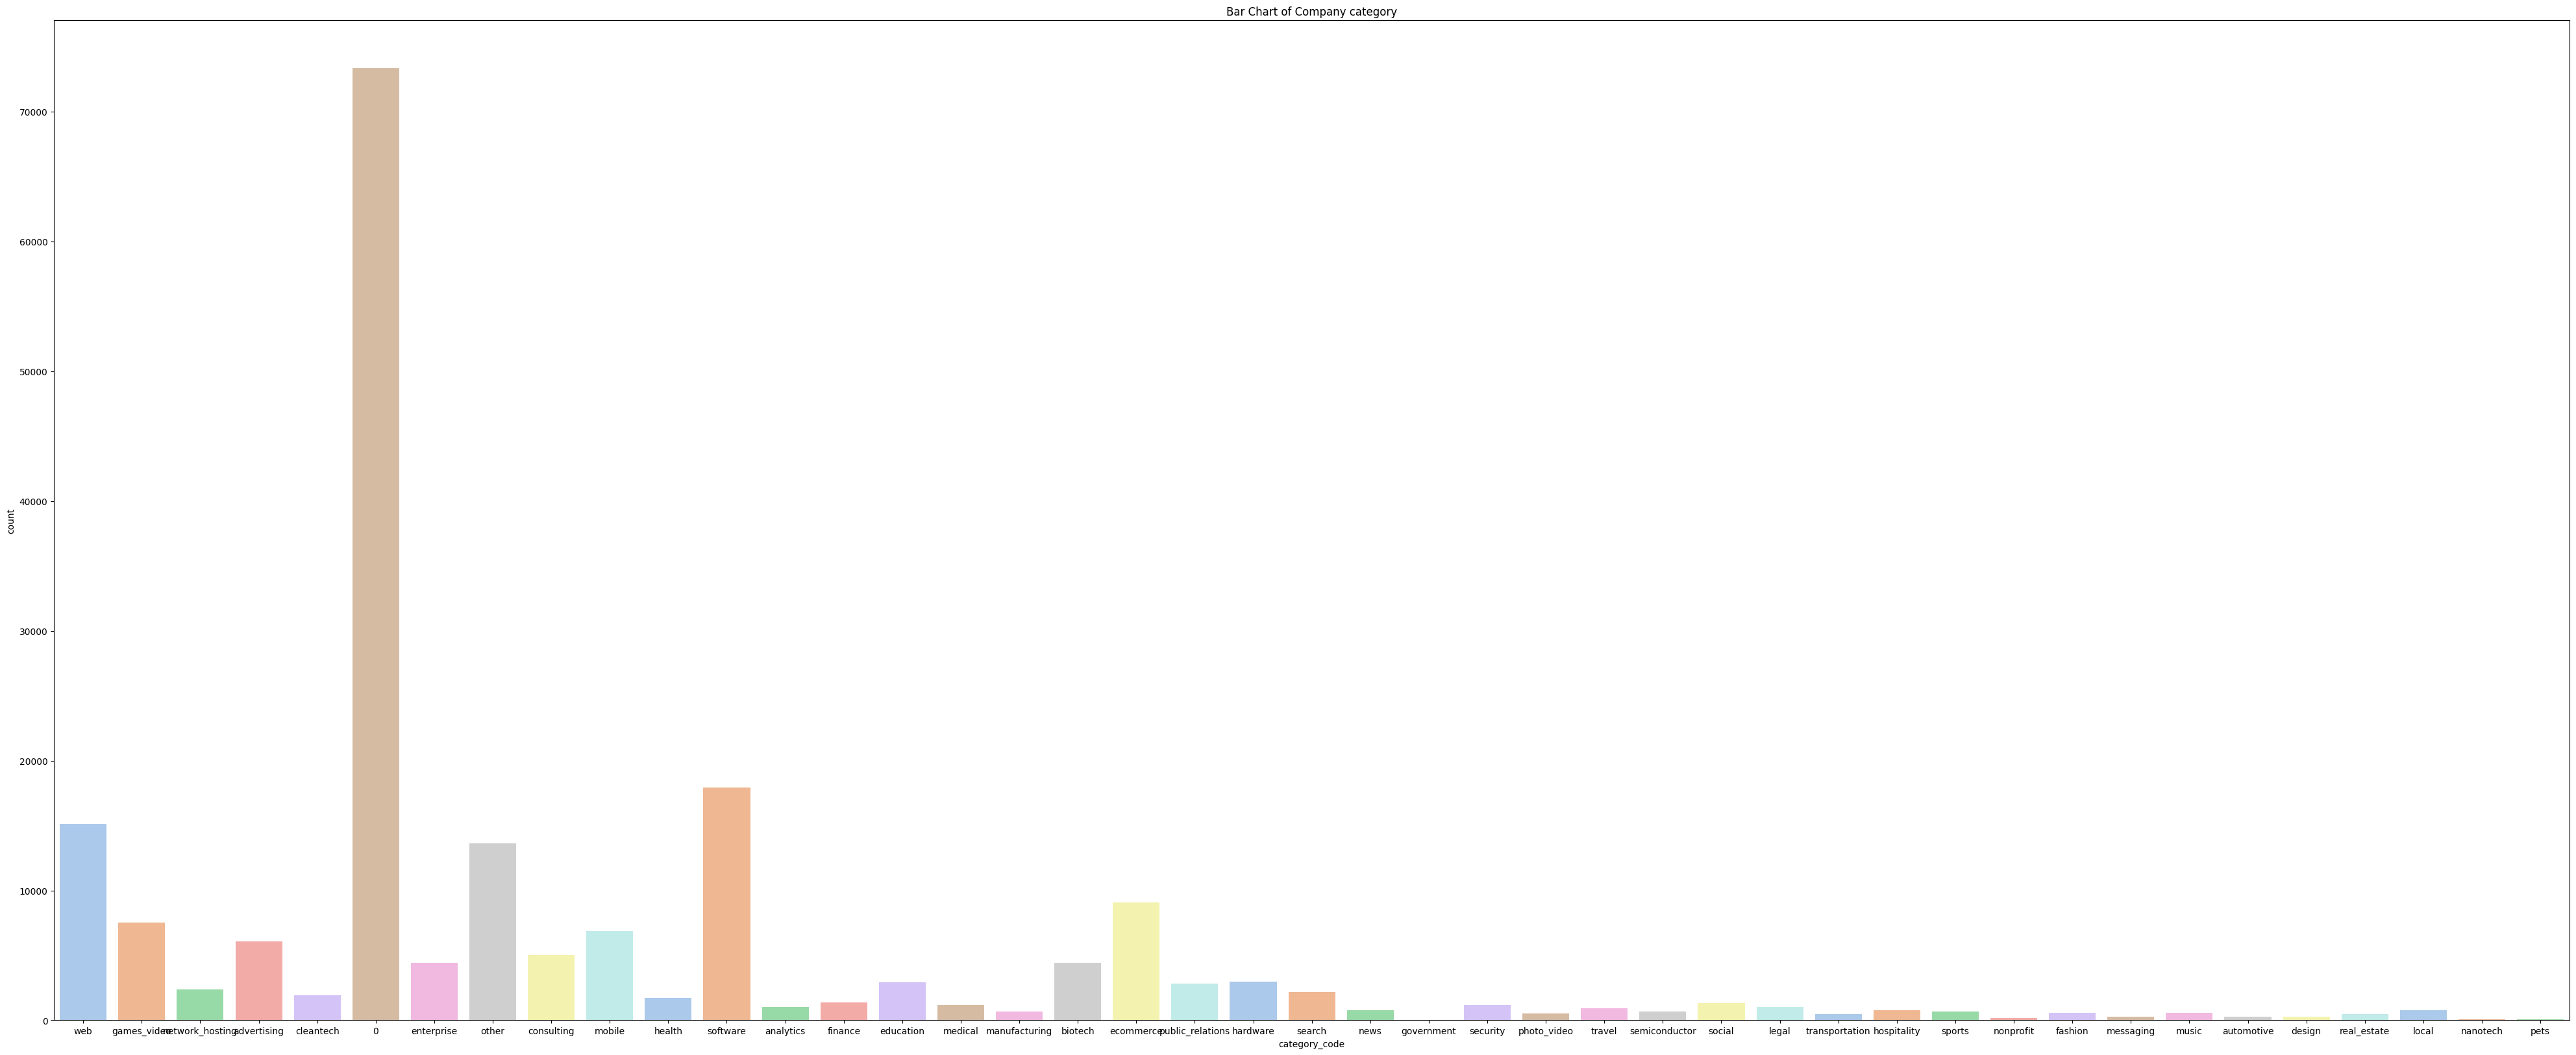

In [84]:
# Plot bar chart for a categorical variable
plt.figure(figsize=(50, 20))
sns.countplot(x='category_code', data=df, palette='pastel')
plt.title('Bar Chart of Company category')
plt.show()

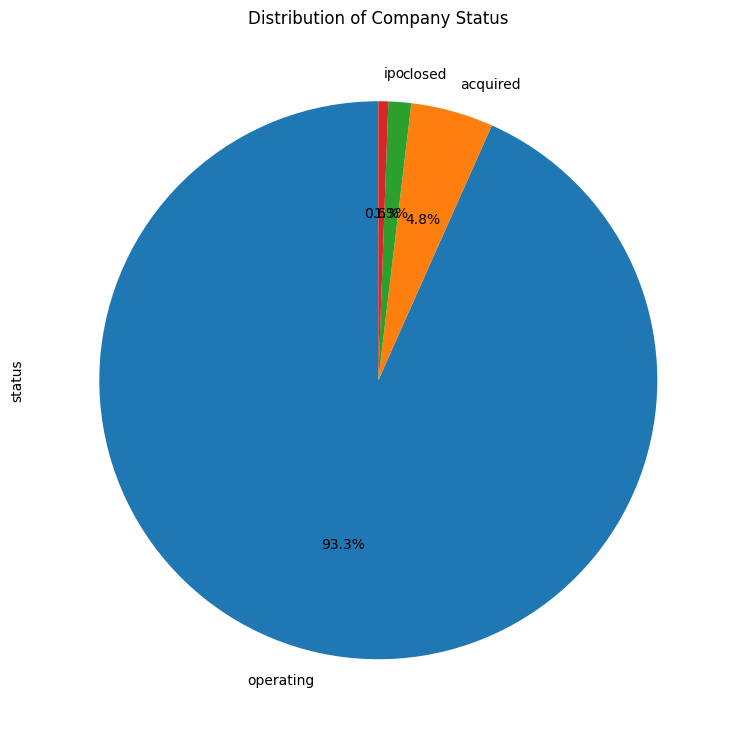

In [87]:
plt.figure(figsize=(9, 10))
df['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Company Status')
plt.show()

<ipython-input-88-e3d2d8b7b966>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['company_age'], shade=True, color='salmon')


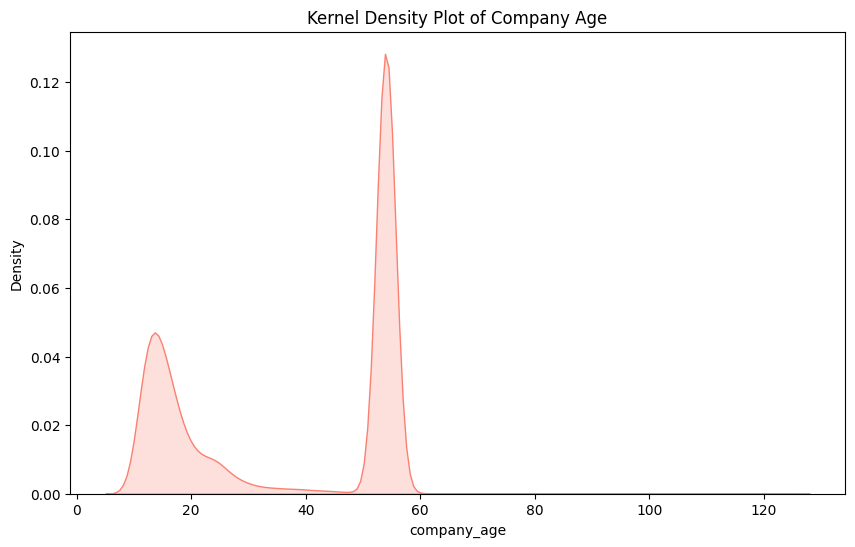

In [88]:
# Plot kernel density plot for a numerical variable
plt.figure(figsize=(10, 6))
sns.kdeplot(df['company_age'], shade=True, color='salmon')
plt.title('Kernel Density Plot of Company Age')
plt.show()

**BIVARIATE ANALYSIS**

**Bivariate analysis involves the simultaneous analysis of two variables to understand the relationships between them. The main goal is to explore how changes in one variable relate to changes in another.**

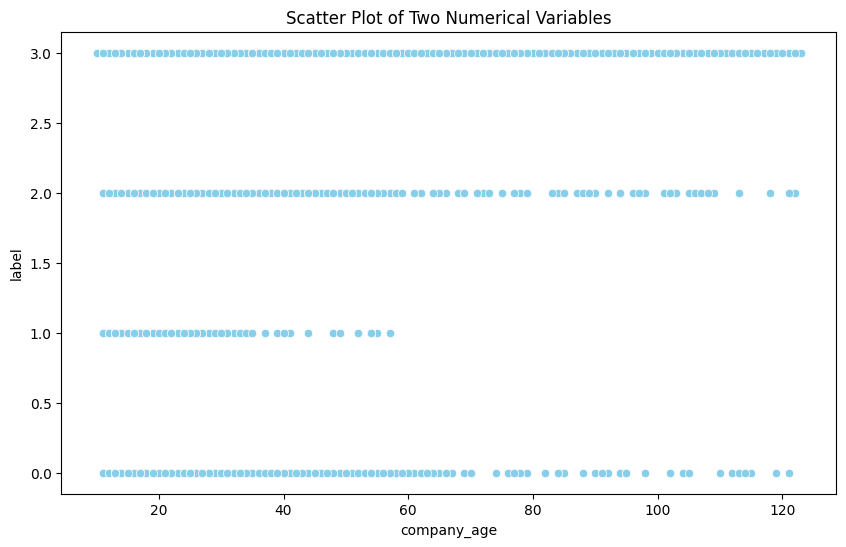

In [42]:
# Plot scatter plot for two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_age', y='label', data=df, color='skyblue')
plt.title('Scatter Plot of Two Numerical Variables')
plt.show()

<ipython-input-43-8f6fa36b6f44>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_age', y='label', data=df, palette='pastel')


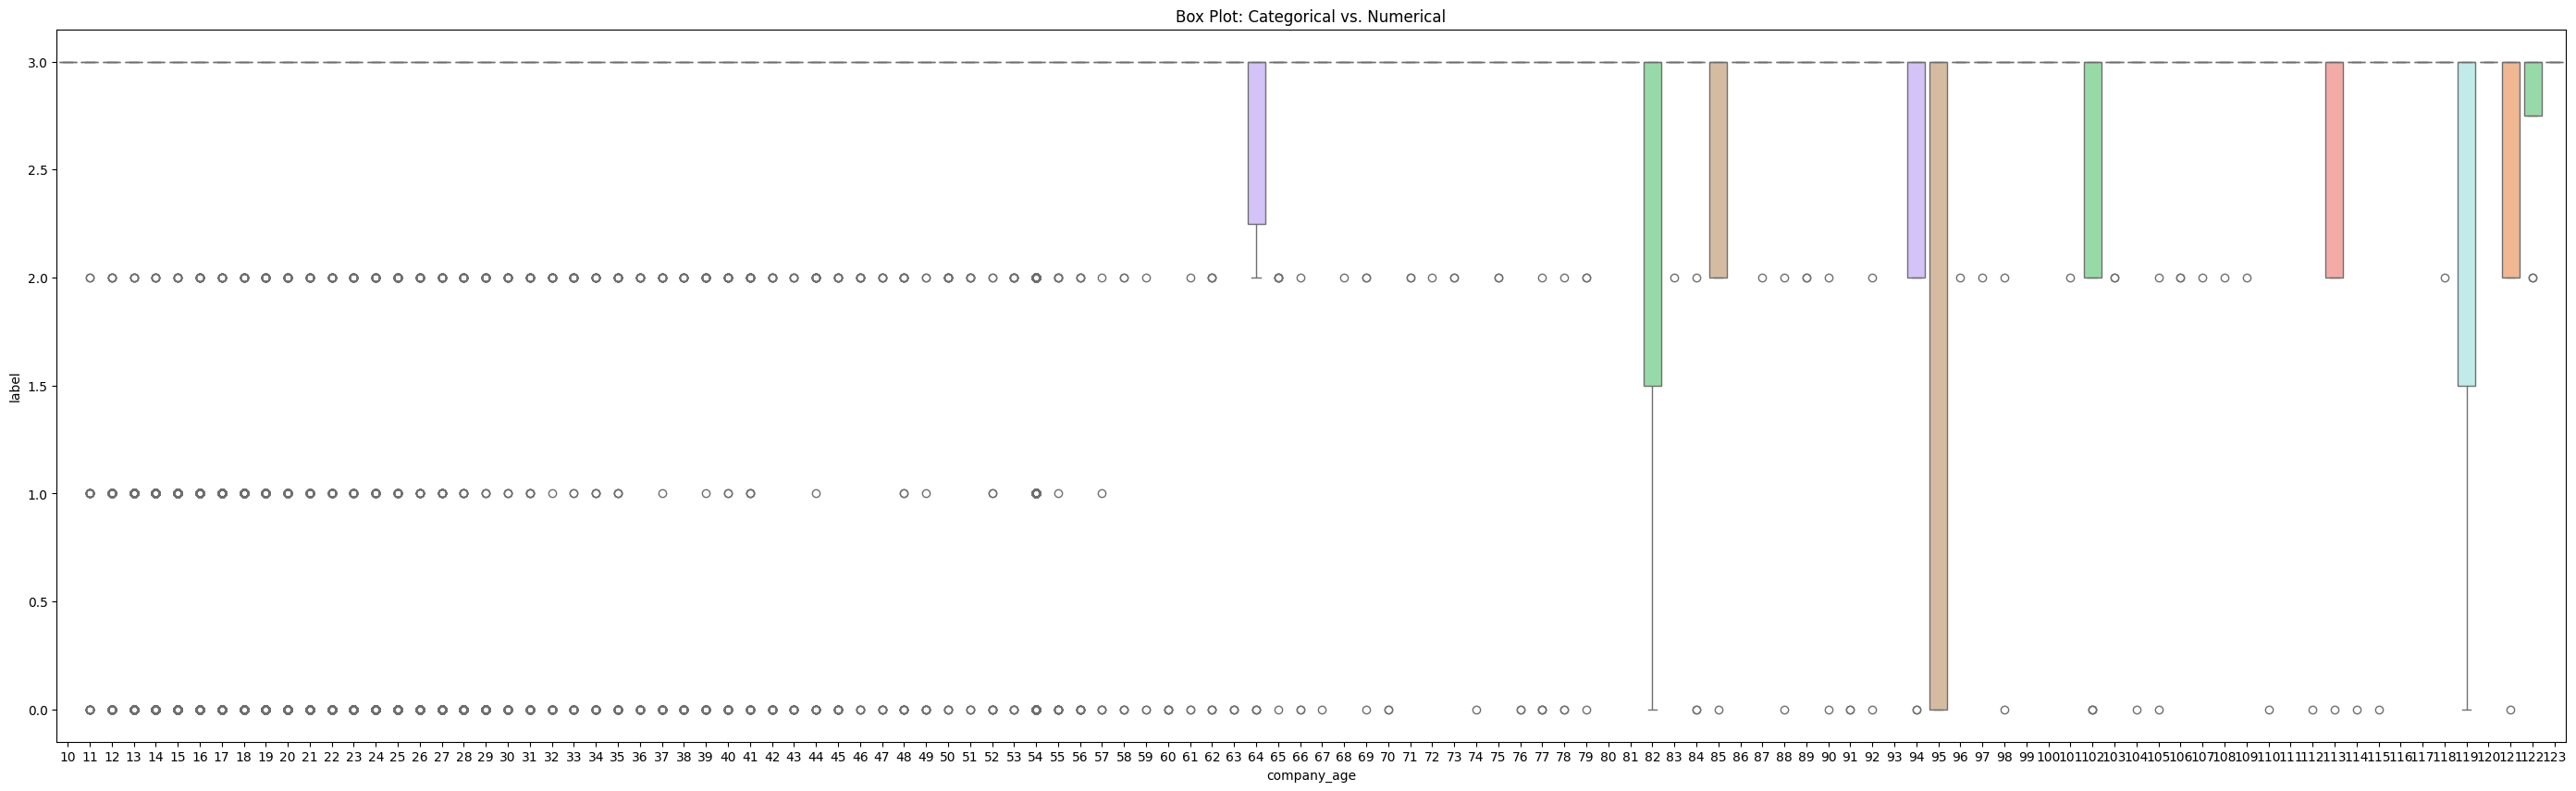

In [43]:
# Plot box plot for a numerical variable across different categories of a categorical variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(35, 10))
sns.boxplot(x='company_age', y='label', data=df, palette='pastel')
plt.title('Box Plot: Categorical vs. Numerical')
plt.show()


<ipython-input-89-7c54ed076a6f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category_code', y='label', data=df, hue='status', ci=None)


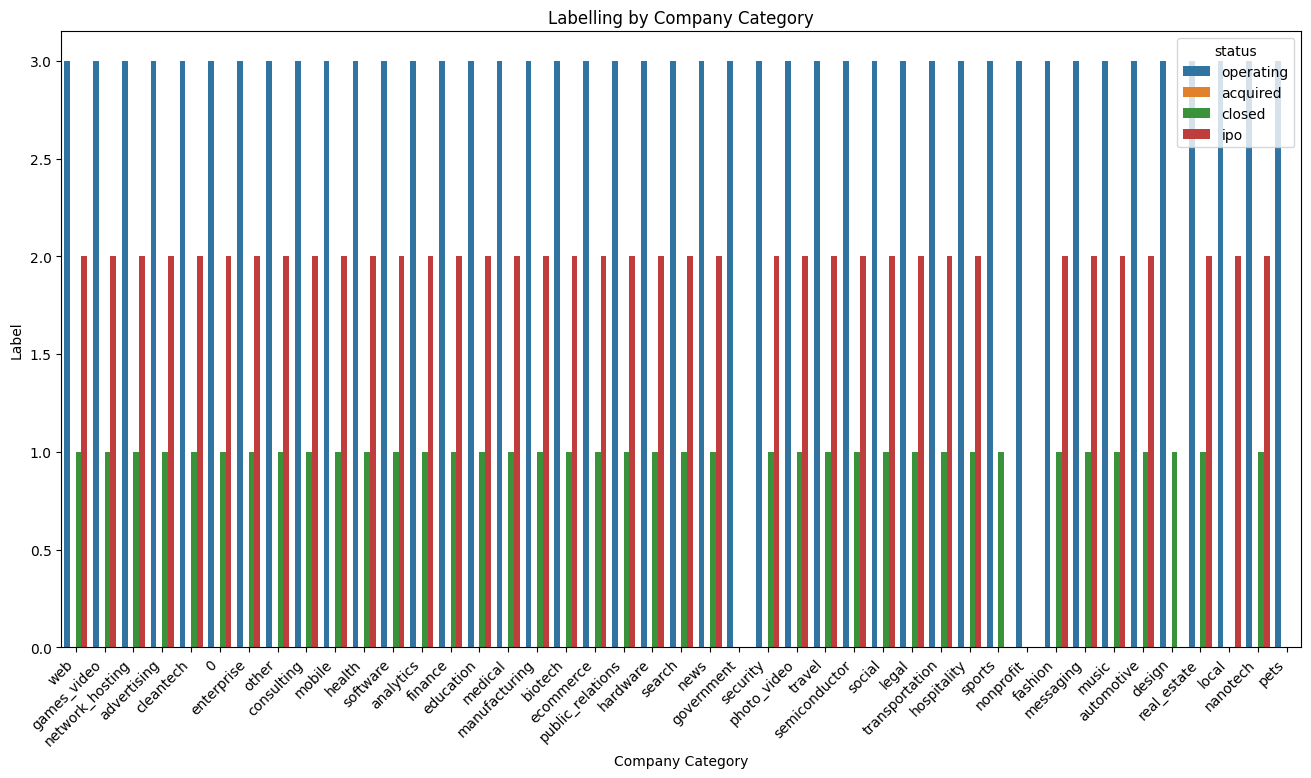

In [89]:
plt.figure(figsize=(16, 8))
sns.barplot(x='category_code', y='label', data=df, hue='status', ci=None)
plt.title('Labelling by Company Category')
plt.xlabel('Company Category')
plt.ylabel('Label')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-90-93204daacf66>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['lat'], label='Latitude', shade=True)
<ipython-input-90-93204daacf66>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['lng'], label='Longitude', shade=True)


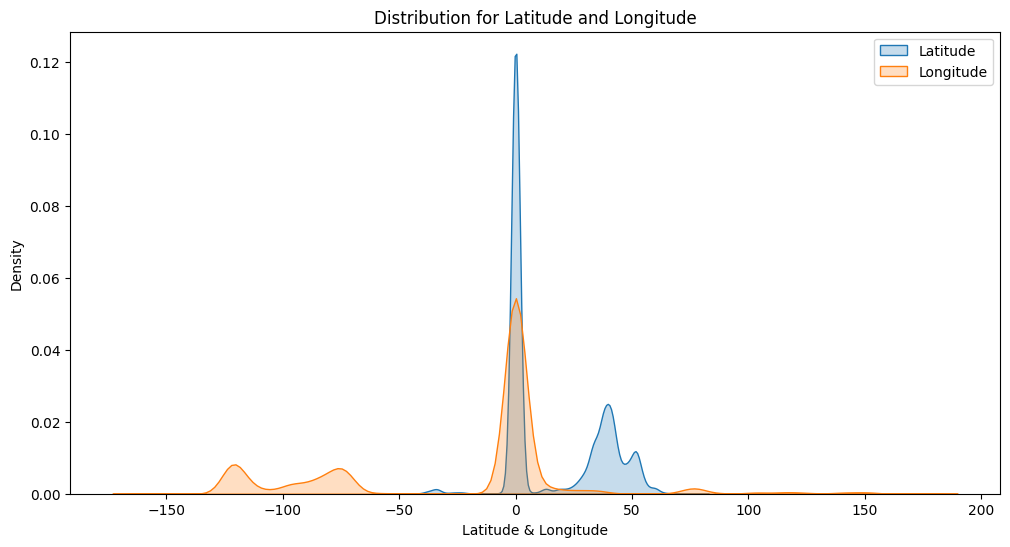

In [90]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['lat'], label='Latitude', shade=True)
sns.kdeplot(df['lng'], label='Longitude', shade=True)
plt.title('Distribution for Latitude and Longitude')
plt.xlabel('Latitude & Longitude')
plt.ylabel('Density')
plt.legend()
plt.show()

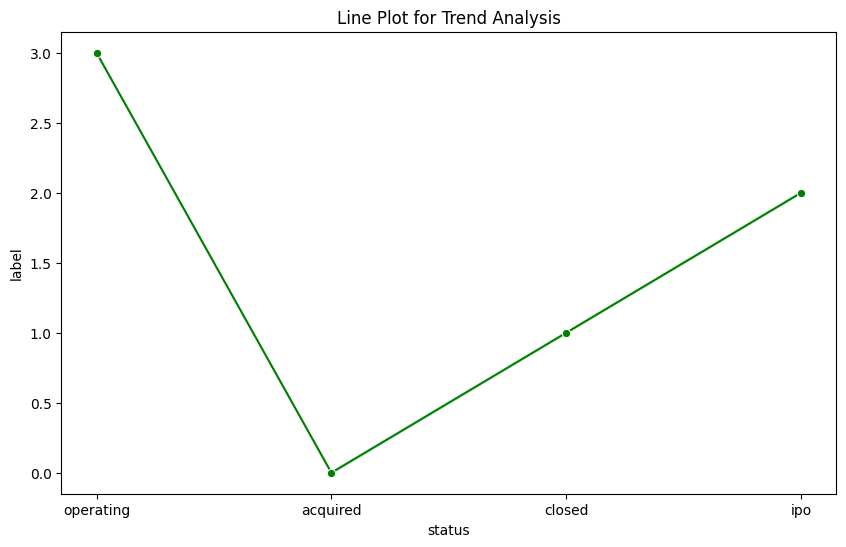

In [44]:
# Plot of line chart to show the trend of a numerical variable over different values of another variable
plt.figure(figsize=(10, 6))
sns.lineplot(x='status', y='label', data=df, marker='o', color='green')
plt.title('Line Plot for Trend Analysis')
plt.show()

**MULTIVARIATE ANALYSIS**

**Multivariate analysis is a statistical technique that involves the simultaneous analysis of multiple variables to understand the relationships and patterns within a dataset. This type of analysis is particularly useful when dealing with complex datasets where several variables may influence each other.**

<ipython-input-46-4fc38b619de9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


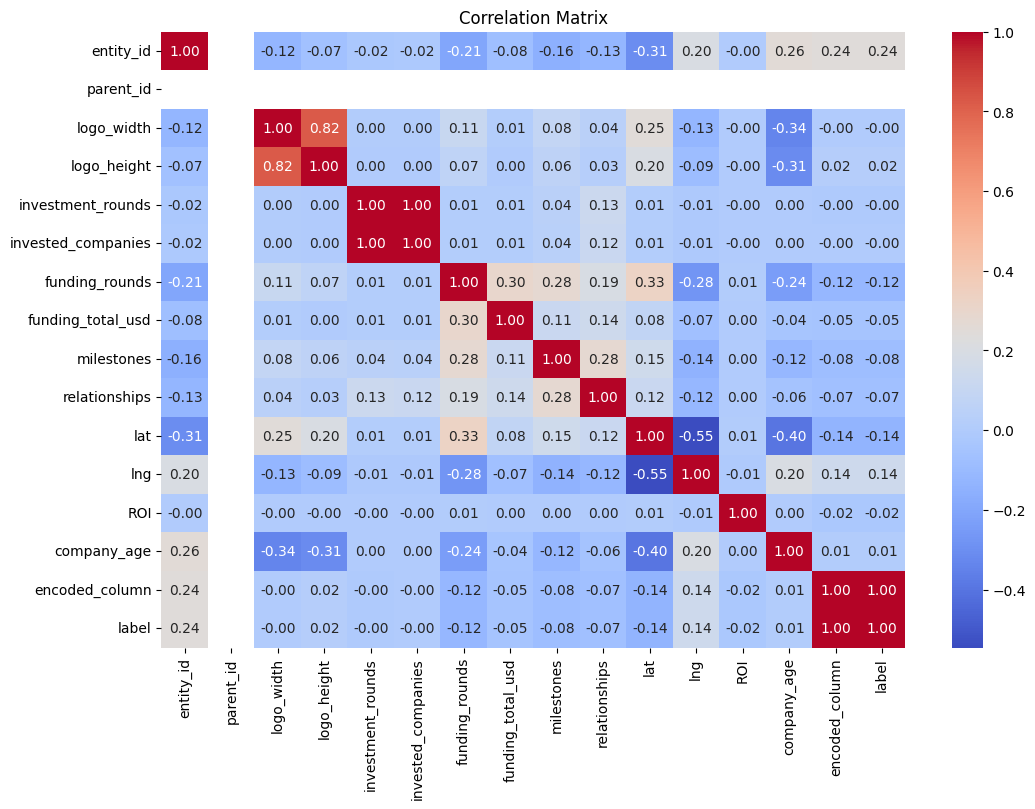

In [46]:
# Visualize correlation matrix using a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

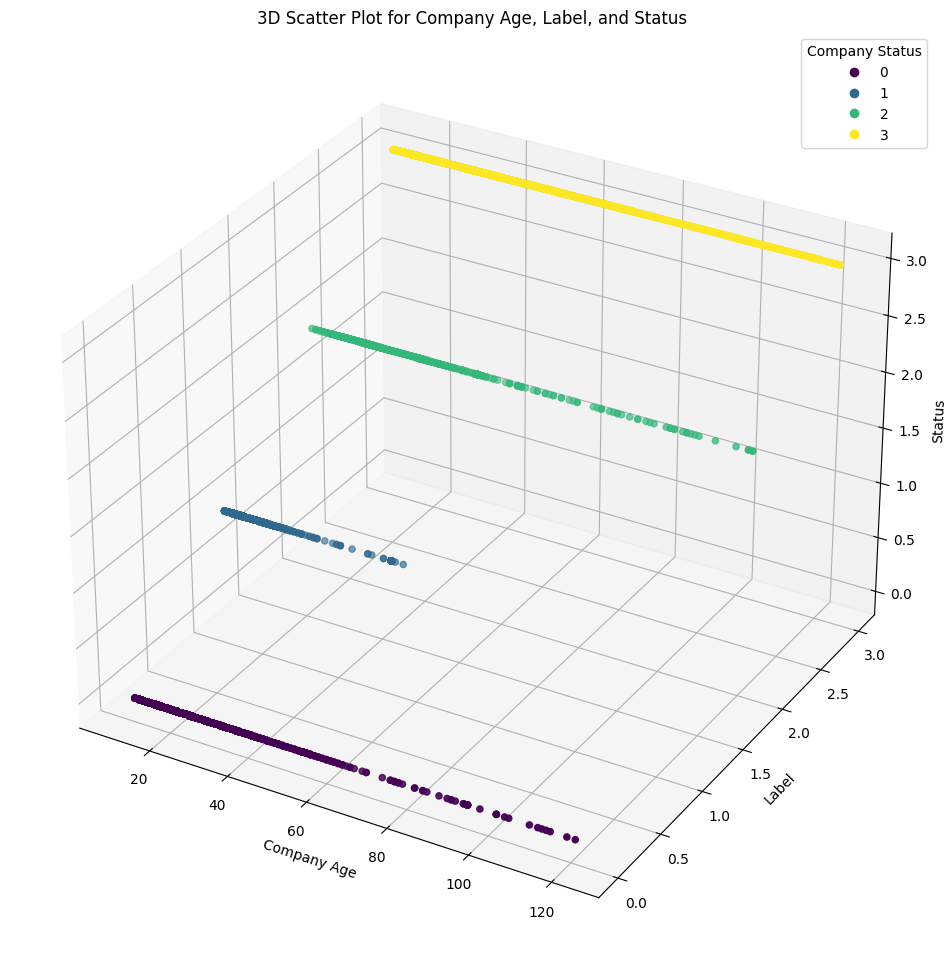

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['company_age'], df['label'], df['status'].astype('category').cat.codes, c=df['status'].astype('category').cat.codes, cmap='viridis', s=20)
ax.set_xlabel('Company Age')
ax.set_ylabel('Label')
ax.set_zlabel('Status')
ax.set_title('3D Scatter Plot for Company Age, Label, and Status')
ax.legend(*scatter.legend_elements(), title='Company Status')
plt.show()

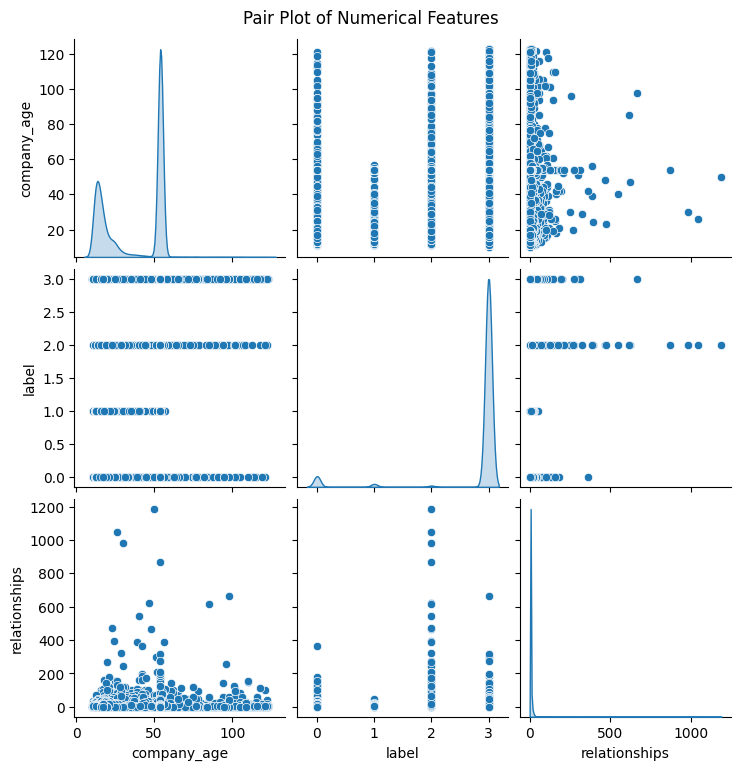

In [78]:
# Create a pair plot to visualize relationships between numerical features
numerical_features = ['company_age', 'label', 'relationships']
sns.pairplot(df[numerical_features], diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

<ipython-input-47-897836720433>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='company_age', y='label', data=df, palette='pastel')


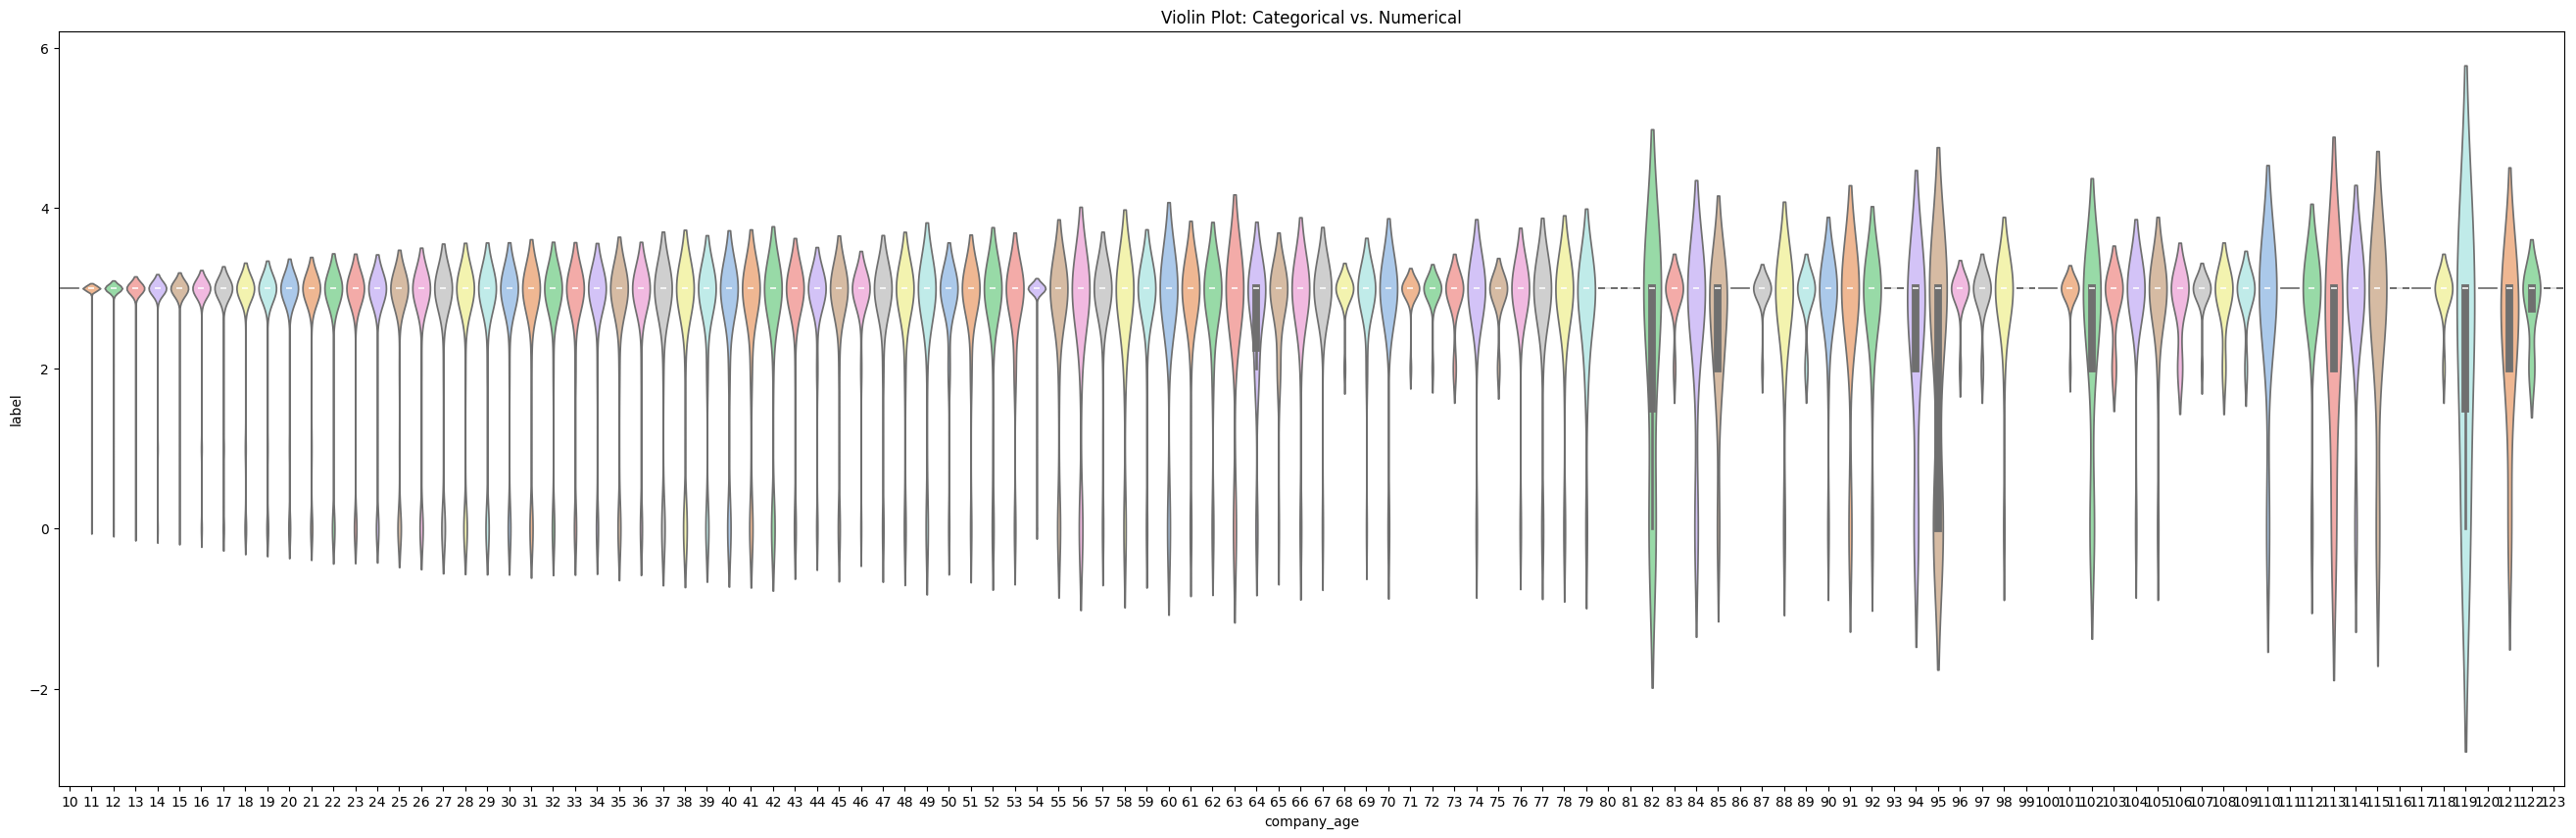

In [47]:
# Plot of violin plot for a numerical variable across different categories of a categorical variable
plt.figure(figsize=(33, 10))
sns.violinplot(x='company_age', y='label', data=df, palette='pastel')
plt.title('Violin Plot: Categorical vs. Numerical')
plt.show()